**Name - Yuvraj Yadav**

**Roll no. - UE198119**

**Creating a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person(age,sex,cholesterol,etc...)**

In [ ]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**DATA**

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exerice test . The goal field refers to presence of heart disease in the patient. In general , to confirm 100% if a patient has heart disease can be quite an invasive process , so if we can create a model that accurately predicts the likelihood of heart disease , we can help avoid expensive and invasive procedures.

Content:

Attribute Information-

-age

-sex

-chest pain type(4 values)

-resting blood pressure

-serum cholestrol in mg/dl

-fasting blood sugar>120 mg/dl

-resting electrocardiographic results(values 0,1,2)

-maximum heart rate achieved

-exercise induced angina

-oldpeak = ST depression induced by exercise realtive to rest 

-the slope of the peak exercise ST segment

-number of major vessels (0-3) colored by flourosopy

-thal:3=normal ; 6=fixed defect; 7=reversable defect

-target:0 for no presence of heart disease , 1 for presence of heart disease


**Original Source** : https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [ ]:
#Reading the data
df=pd.read_csv('/content/heartdataset.csv')

In [ ]:
df.head()
#checking for the first few values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0


**Exploratory Data Analysis**

Exploring if the dataset has any missing data points

In [ ]:
df['target'].unique()

array([0, 1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


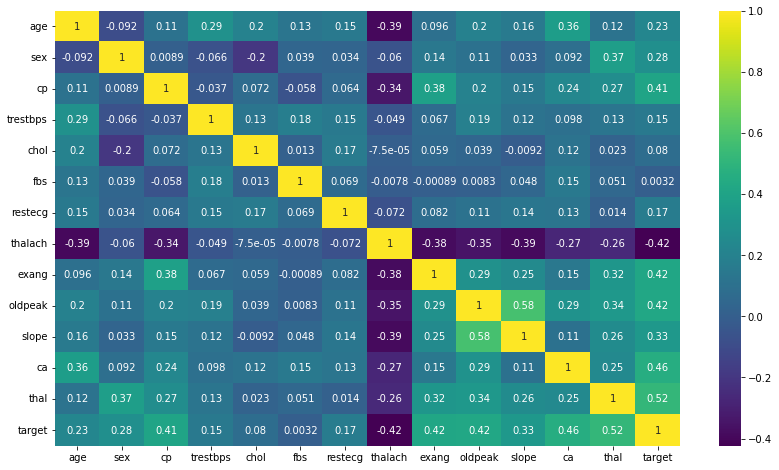

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

**Train | Test Split and Scaling**

Separating the features from the labels into 2 objects, x and y.

In [ ]:
x=df.drop('target',axis=1)
y=df['target']

Performing a train test split on the data , with the test size of 10% and a random_state of 101.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1,random_state=101)

Creating a StandardScaler object and normalizing the x train and test set feature data

In [ ]:
scaler=StandardScaler()

In [ ]:
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.transform(x_test)

**Logistic Regression Model** 

Creating a Logistic Regression model and using cross-validation to find a well-performing C value for the hyper-parameter search.Here , used LogisticRegressionCV

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
log_model=LogisticRegressionCV()

In [ ]:
log_model.fit(scaled_x_train,y_train)

LogisticRegressionCV()

Reporting back your search's optimal parameters , specifically the C value 

In [ ]:
log_model.C_

array([0.00599484])

In [ ]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

**Coeffecients**

Reporting back the model's coefficients

In [ ]:
log_model.coef_

array([[ 0.06993947,  0.10891333,  0.18372181,  0.05094333,  0.01954511,
        -0.03005169,  0.06376511, -0.16118492,  0.16198121,  0.14709362,
         0.10916829,  0.1875614 ,  0.21979336]])

**Model Performance Evaluation**

Evaluating model on the remaining 10% of the data , the test set.

Creating the following evaluations.

-Confusion Matrix Array

-Confusion Matrix Plot

-Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred=log_model.predict(scaled_x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[18,  1],
       [ 4,  7]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


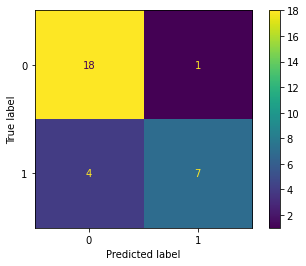

In [ ]:
plot_confusion_matrix(log_model,scaled_x_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.88      0.64      0.74        11

    accuracy                           0.83        30
   macro avg       0.85      0.79      0.81        30
weighted avg       0.84      0.83      0.83        30



**Performance Curves**

Creating both the precision recall curve and the ROC curve

In [ ]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


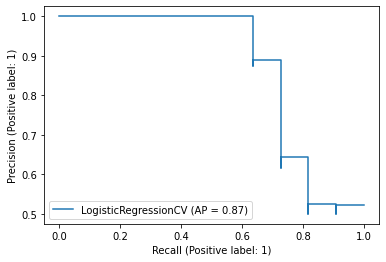

In [ ]:
plot_precision_recall_curve(log_model,scaled_x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


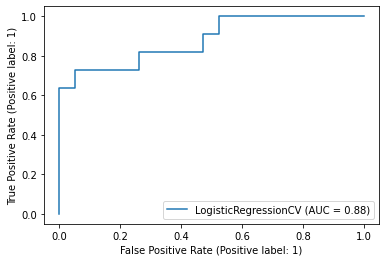

In [ ]:
plot_roc_curve(log_model,scaled_x_test,y_test)

**What does model predict for this patient ? Do they have heart disease ? How "sure" is model of this prediction ?**

For convience , created an array of the features for the patient above

In [ ]:
patient=[[54. , 1. , 0. , 122. , 286. , 0. , 0. , 116. , 1. , 3.2, 1. , 2. , 2. ]]

In [ ]:
x_test.iloc[-1]

age          48.0
sex           1.0
cp            2.0
trestbps    110.0
chol        229.0
fbs           0.0
restecg       0.0
thalach     168.0
exang         0.0
oldpeak       1.0
slope         3.0
ca            0.0
thal          2.0
Name: 16, dtype: float64

In [ ]:
y_test.iloc[-1]

1

In [ ]:
log_model.predict(patient)

array([0])

In [ ]:
log_model.predict_proba(patient)

array([[0.82776912, 0.17223088]])